In [1]:
!pip install ultralytics

import os
from ultralytics import YOLO
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set paths
dataset_path = '/content/drive/MyDrive/kidneydata'
images_path = '/content/drive/MyDrive/kidneydata/train/images'
labels_path = '/content/drive/MyDrive/kidneydata/train/labels'
data_yaml = '/content/drive/MyDrive/kidneydata/data.yaml'

# Verify that the paths exist
print(f"Dataset path exists: {os.path.exists(dataset_path)}")
print(f"Images path exists: {os.path.exists(images_path)}")
print(f"Labels path exists: {os.path.exists(labels_path)}")
print(f"data.yaml exists: {os.path.exists(data_yaml)}")

# Initialize the model
model = YOLO('yolov8l.pt')  # Load YOLOv8 large model





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 14.3 MB/s eta 0:00:00
Mounted at /content/drive
Dataset path exists: True
Images path exists: True
Labels path exists: True
data.yaml exists: True


100%|██████████| 83.7M/83.7M [00:00<00:00, 143MB/s]


In [2]:
# Train the model
results = model.train(
    data=data_yaml,
    epochs=25,  # You can adjust this
    imgsz=640,
    batch=16,  # Adjust based on your GPU memory
    name='kidney_stone_model'
)

# Save the trained model
model.save('/content/drive/MyDrive/kidney_stone_yolov8l.pt')

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/kidneydata/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=kidney_stone_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/kidneydata/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/kidneydata/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/kidney_stone_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/kidney_stone_model
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      10.5G      2.317      2.939      1.438         58        640: 100%|██████████| 66/66 [03:08<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      10.5G      2.236      1.524      1.365         47        640: 100%|██████████| 66/66 [00:51<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      10.4G      2.279       1.43      1.371         49        640: 100%|██████████| 66/66 [00:51<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        123        325      0.353      0.385       0.29      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      10.5G      2.269      1.345      1.368         47        640: 100%|██████████| 66/66 [00:50<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        123        325      0.555      0.498      0.471      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      10.4G      2.135      1.231      1.314         51        640: 100%|██████████| 66/66 [00:51<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        123        325      0.497      0.446      0.437      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      10.5G      2.107       1.21      1.307         50        640: 100%|██████████| 66/66 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        123        325      0.673      0.594      0.597      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      10.6G      2.064      1.121      1.296         41        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        123        325      0.682      0.597      0.592      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      10.5G      2.111       1.19      1.286         65        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        123        325      0.678      0.652      0.623      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      10.4G      2.083      1.135      1.265         43        640: 100%|██████████| 66/66 [00:51<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        123        325      0.738      0.554      0.602      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      10.5G       2.05      1.113      1.266         37        640: 100%|██████████| 66/66 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        123        325      0.501      0.314       0.33      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      10.5G      2.096      1.126      1.276         46        640: 100%|██████████| 66/66 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        123        325      0.648       0.56      0.525      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      10.4G       1.98      1.069      1.233         61        640: 100%|██████████| 66/66 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        123        325      0.692      0.591      0.631      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      10.5G      2.004      1.052      1.255         38        640: 100%|██████████| 66/66 [00:51<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        123        325      0.771      0.606       0.63      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      10.6G      2.005       1.06      1.258         44        640: 100%|██████████| 66/66 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        123        325      0.689      0.637      0.652      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      10.5G      1.981      1.017      1.276         38        640: 100%|██████████| 66/66 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        123        325      0.784       0.67      0.708      0.295


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      10.5G      1.978      1.021      1.289         27        640: 100%|██████████| 66/66 [00:51<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        123        325      0.744      0.692      0.678      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      10.4G      1.958      1.011      1.273         22        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        123        325       0.75      0.634      0.688      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      10.4G      1.963     0.9781      1.262         24        640: 100%|██████████| 66/66 [00:51<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        123        325       0.78      0.637       0.65      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      10.4G      1.949       1.02      1.281         32        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        123        325        0.8      0.683      0.724      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      10.6G      1.923     0.9503      1.248         24        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        123        325      0.778      0.631      0.697      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      10.4G      1.892      0.976      1.249         38        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        123        325      0.733      0.665      0.667      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      10.4G      1.868     0.9337      1.216         33        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        123        325      0.751      0.683      0.706      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      10.5G      1.856     0.9093      1.225         29        640: 100%|██████████| 66/66 [00:50<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.772      0.717      0.742      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      10.5G      1.825     0.8969      1.204         32        640: 100%|██████████| 66/66 [00:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        123        325      0.765      0.711      0.742      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      10.4G      1.835     0.8868      1.215         19        640: 100%|██████████| 66/66 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        123        325      0.787      0.695      0.735      0.297



25 epochs completed in 0.438 hours.
Optimizer stripped from runs/detect/kidney_stone_model/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/kidney_stone_model/weights/best.pt, 87.6MB

Validating runs/detect/kidney_stone_model/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]


                   all        123        325      0.763      0.711      0.742      0.303
Speed: 1.2ms preprocess, 14.8ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/kidney_stone_model


Saving 1-3-46-670589-33-1-63709079072689291800001-4862263206834957747_png_jpg.rf.cd218d4ed600ad3b24e4af71077096bd.jpg to 1-3-46-670589-33-1-63709079072689291800001-4862263206834957747_png_jpg.rf.cd218d4ed600ad3b24e4af71077096bd.jpg

0: 544x640 1 Tas_Var, 59.8ms
Speed: 3.0ms preprocess, 59.8ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


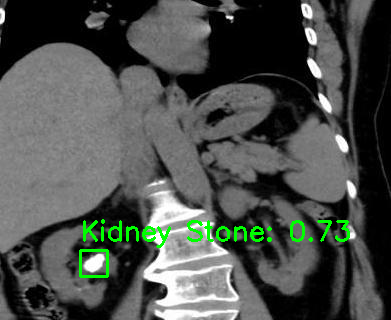

In [8]:
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def upload_and_detect():
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Read the image file
        image_bytes = uploaded[filename]
        nparr = np.frombuffer(image_bytes, np.uint8)
        image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # Perform detection
        results = model(image)

        # Draw bounding boxes on the image
        for r in results:
            boxes = r.boxes
            for box in boxes:
                b = box.xyxy[0].cpu().numpy()
                cv2.rectangle(image, (int(b[0]), int(b[1])), (int(b[2]), int(b[3])), (0, 255, 0), 2)
                conf = box.conf[0].item()
                cv2.putText(image, f'Kidney Stone: {conf:.2f}', (int(b[0]), int(b[1] - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display the result
        cv2_imshow(image)

# Run the upload and detect function
upload_and_detect()

In [9]:
from google.colab import files
import os

# Assuming your model is already trained and named 'model'
# If not, make sure you've loaded or trained your model before running this code

# Save the model to a file in Colab
save_path = '/content/kidney_stone_model.pt'
model.save(save_path)

# Download the file to your local machine
files.download(save_path)

print(f"Model saved and download initiated for {save_path}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved and download initiated for /content/kidney_stone_model.pt
